In [2]:
import pandas as pd

In [ ]:
# df1= pd.read_csv('/content/placement data.csv')
# df1

In [3]:
# df1 = pd.read_csv('/content/tallest_person.csv')

In [ ]:
# df2= pd.read_csv('/content/placement data.csv')

In [4]:
df1= pd.read_csv('/content/tallest_person.csv')
df1

FileNotFoundError: [Errno 2] No such file or directory: '/content/tallest_person.csv'

## **Preprocessing**

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [7]:
df2=df1.iloc[:,1:]
df2

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [8]:
df2=df2.drop(columns=['midparentHeight'])
df2

,family,father,mother,children,childNum,gender,childHeight
0,001,78.5,67.0,4,1,male,73.2
1,001,78.5,67.0,4,2,female,69.2
2,001,78.5,67.0,4,3,female,69.0
3,001,78.5,67.0,4,4,female,69.0
4,002,75.5,66.5,4,1,male,73.5
...,...,...,...,...,...,...,...
929,203,62.0,66.0,3,1,male,64.0
930,203,62.0,66.0,3,2,female,62.0
931,203,62.0,66.0,3,3,female,61.0
932,204,62.5,63.0,2,1,male,66.5


In [9]:
df2=df1.drop(columns=['midparentHeight','children','childNum','rownames'])
df2

,family,father,mother,gender,childHeight
0,001,78.5,67.0,male,73.2
1,001,78.5,67.0,female,69.2
2,001,78.5,67.0,female,69.0
3,001,78.5,67.0,female,69.0
4,002,75.5,66.5,male,73.5
...,...,...,...,...,...
929,203,62.0,66.0,male,64.0
930,203,62.0,66.0,female,62.0
931,203,62.0,66.0,female,61.0
932,204,62.5,63.0,male,66.5


## **EDA**

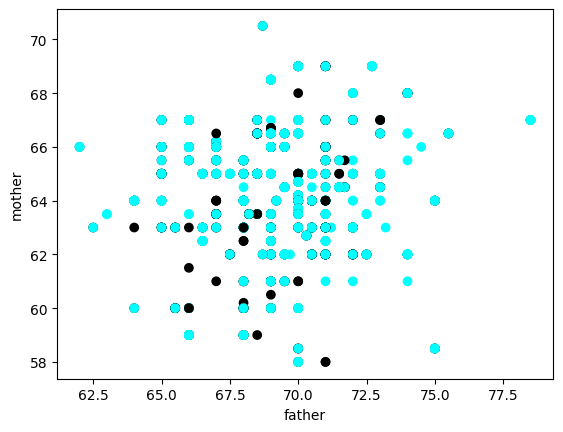

In [18]:
import  matplotlib.pyplot as plt
# Map gender to colors
color_map = {'male': 'black', 'female': 'cyan'}
colors = df2['childGender'].map(color_map)

plt.scatter(df2['father'],df2['mother'],c=colors)
plt.xlabel('father')
plt.ylabel('mother')
plt.show()

In [10]:
df2= df2.rename(columns={'gender':'childGender'})
df2

,family,father,mother,childGender,childHeight
0,001,78.5,67.0,male,73.2
1,001,78.5,67.0,female,69.2
2,001,78.5,67.0,female,69.0
3,001,78.5,67.0,female,69.0
4,002,75.5,66.5,male,73.5
...,...,...,...,...,...
929,203,62.0,66.0,male,64.0
930,203,62.0,66.0,female,62.0
931,203,62.0,66.0,female,61.0
932,204,62.5,63.0,male,66.5


In [12]:
gender_counts = df2['childGender'].value_counts()
# plt.plot(gender_counts.index, gender_counts.values)
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.show()
num_males = gender_counts['male']
num_females = gender_counts['female']

print(f"Number of males: {num_males}")
print(f"Number of females: {num_females}")


Number of males: 481
Number of females: 453


In [13]:
heightSum= df2['childHeight'].sum()
print(heightSum)
avHeight= heightSum/len(df2)
print(avHeight)

62340.7
66.74593147751605


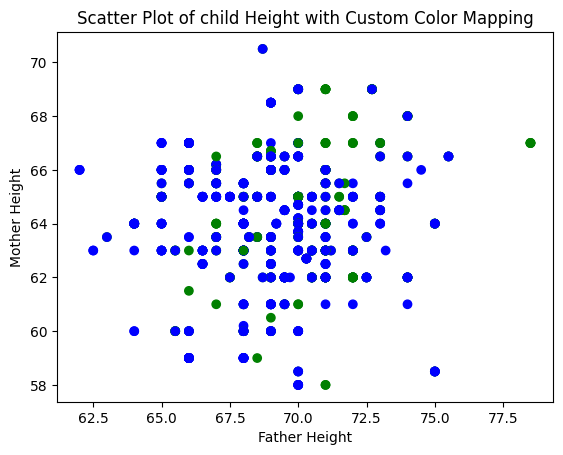

,family,father,mother,childGender,childHeight
0,001,78.5,67.0,male,73.2
1,001,78.5,67.0,female,69.2
2,001,78.5,67.0,female,69.0
3,001,78.5,67.0,female,69.0
4,002,75.5,66.5,male,73.5
...,...,...,...,...,...
929,203,62.0,66.0,male,64.0
930,203,62.0,66.0,female,62.0
931,203,62.0,66.0,female,61.0
932,204,62.5,63.0,male,66.5


In [16]:
# Example with customized conditions and colors
colors = []
for index, row in df2.iterrows():
    if row['childHeight']  < 66.74:
        colors.append('blue')
    elif row['childHeight'] >=66.74:
        colors.append('green')

plt.scatter(df2['father'], df2['mother'], c=colors)
plt.xlabel('Father Height')
plt.ylabel('Mother Height')
plt.title('Scatter Plot of child Height with Custom Color Mapping')
plt.show()
df2


## **EXTRACTING INPUT AND OUTPUT COLUMNS**

In [25]:
# df2
df3=df2.iloc[:,1:3]
df3
df4=df2.iloc[:,-1:]
df4

,childHeight
0,73.2
1,69.2
2,69.0
3,69.0
4,73.5
...,...
929,64.0
930,62.0
931,61.0
932,66.5


### **Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split
df3_train,df3_test,df4_train,df4_test=train_test_split(df3,df4,test_size=0.1)

In [28]:
df3_train

,father,mother
929,62.0,66.0
699,68.0,60.0
821,66.0,65.5
182,71.5,64.5
491,69.2,64.0
...,...,...
189,71.0,64.5
219,71.0,62.0
40,74.0,62.0
25,74.0,68.0


## **Scalingvalues**  

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df3_train=sc.fit_transform(df3_train)
df3_test=sc.transform(df3_test)
df4_train=sc.fit_transform(df4_train)
df4_test=sc.transform(df4_test)

In [32]:
df3_train

array([[-2.95788619,  0.81413649],
       [-0.49749663, -1.79873152],
       [-1.31762648,  0.59639749],
       ...,
       [ 1.96289293, -0.92777551],
       [ 1.96289293,  1.6850925 ],
       [ 0.52766569,  0.37865849]])

## **MODEL TRAINING**

In [51]:
# from sklearn.linear_model import LinearRegression
# clf= LinearRegression()
# clf.fit(df3_train,df4_train)
# from sklearn.linear_model import LogisticRegression
# clf= LogisticRegression()
# clf.fit(df3_train,df4_train)

In [52]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lin_reg_model = LinearRegression()

# Train the model
lin_reg_model.fit(df3_train, df4_train)

LinearRegression()

In [43]:
# df4_train

In [48]:
df3_pred=clf.predict(df3_test)

In [47]:
# df4_test

In [60]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df3_pred = lin_reg_model.predict(df3_test)

mse = mean_squared_error(df4_test, df3_pred)

r2 = r2_score(df4_test, df3_pred)

tolerance = 2
accuracy_within_tolerance = np.sum(np.abs(df4_test - df3_pred) <= tolerance) / len(df4_test)



print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Accuracy within tolerance of 2 inches:", accuracy_within_tolerance)


Mean Squared Error: 0.8488343662424388
R^2 Score: 0.09928519988607676
Accuracy within tolerance of 2 inches: 0.9893617021276596
